## Introduction

🌐 In today's financial landscape, credit scores play a pivotal role in assessing an individual's creditworthiness. Lenders, ranging from traditional banks to online lending platforms, heavily rely on credit scores to make informed decisions about extending credit. As the demand for credit continues to rise, the need for accurate and efficient credit score classification becomes paramount. Machine learning techniques offer a powerful toolset for analyzing vast amounts of financial data to predict and classify credit scores.

## Project Statement

🛠️ This project aims to explore and implement machine learning algorithms for credit score classification. By leveraging historical credit data, the objective is to train models that can accurately predict credit scores based on various financial and non-financial features.

> 🤖 The project will delve into feature engineering, model selection, and performance evaluation to create a robust and reliable credit scoring system. The ultimate goal is to contribute to the enhancement of credit risk assessment methodologies, providing financial institutions with more precise tools for evaluating potential borrowers. Through this exploration of machine learning in credit scoring, we aim to contribute to the ongoing evolution of the financial industry and promote more efficient and equitable lending practices 📈💳




## About the Dataset

**Dataset Size**

1.   train.csv - 100000 rows
2.   test.csv - 50000 rows

**Columns**

*   ID: Unique identifier for each record in the dataset.

*   Customer_ID: Unique identifier for each customer.
*   Month: The month for which the financial data is recorded.
*   Name: Name of the individual.
*   Age: Age of the individual.
*   SSN: Social Security Number, a unique identifier for individuals in the U.S.
*   Occupation: The occupation or profession of the individual.
*   Annual_Income: Annual income of the individual.
*   Monthly_Inhand_Salary: Net monthly salary after deductions.
*   Num_Bank_Accounts: Number of bank accounts held by the individual.
*   Num_Credit_Card: Number of credit cards owned by the individual.
*   Interest_Rate: Interest rate associated with financial transactions.
*   Num_of_Loan: Number of loans the individual has.
*   Type_of_Loan: The type of loan(s) the individual has.
*   Delay_from_due_date: Delay in payments from the due date.
*   Num_of_Delayed_Payment: Number of delayed payments.
*   Changed_Credit_Limit: Whether there has been a change in credit limit.
*   Num_Credit_Inquiries: Number of credit inquiries made.
*   Credit_Mix: The mix of different types of credit.
*   Outstanding_Debt: Amount of outstanding debt.
*   Credit_Utilization_Ratio: Ratio of credit used to the total credit available.
*   Credit_History_Age: Age of credit history.
*   Payment_of_Min_Amount: Payment behavior regarding the minimum amount due.
*   Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments.
*   Amount_invested_monthly: Amount invested by the individual monthly.
*   Payment_Behaviour: Behavior related to payment patterns.
*   Monthly_Balance: Monthly balance in the account.
*   Credit_Score: The credit score assigned to the individual based on various factors.

## Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [2]:
df = pd.read_excel(r"C:\Users\rushi\OneDrive\Desktop\Codealpha\Task 1 Credit_Score_Prediction\train.xlsx")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45131,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df = df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'])

In [8]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45131,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [9]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [10]:
df.shape

(100000, 22)

#### Dataset Statistics

In [11]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


#### Check null values

In [12]:
df.isnull().sum()[df.isnull().sum()>0]

Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

### Data cleaning

In [13]:

df['Age'] = df['Age'].astype(str).str.replace("_", "")
df['Age'] = df['Age'].astype(int)


df['Occupation'] = df['Occupation'].replace("_______", np.nan)


df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace("_", "")
df['Annual_Income'] = df['Annual_Income'].astype(float)


df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace("_", "")
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str).str.replace("_", "")
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)


df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace("_", np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)


df['Credit_Mix'] = df['Credit_Mix'].replace("_", np.nan)

df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace("_", "")
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype(str).str.replace("NM", "No")


df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str).str.replace("_", "")
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)


df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", np.nan)


df['Monthly_Balance'] = df['Monthly_Balance'].astype(str).str.replace("_", "")
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

In [15]:
df.isnull().sum()[df.isnull().sum()>0]

Occupation                  7062
Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

#### Filling null values

In [16]:
# Forward and backward filling des valeurs nulles
df = df.fillna(method = 'ffill')
df= df.fillna(method = 'bfill')

In [17]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

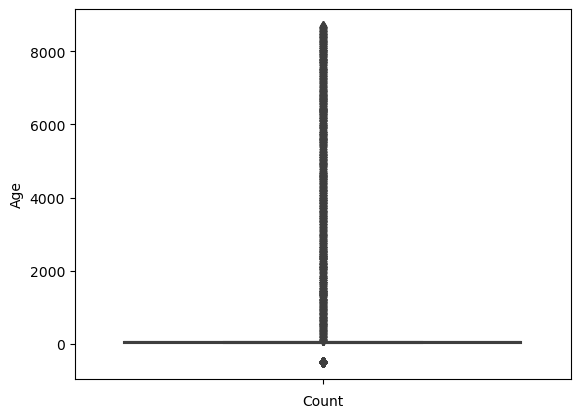

In [18]:
# boxplot
sns.boxplot(y=df['Age'])

plt.xlabel('Count')
plt.ylabel('Age')

plt.show()

In [19]:
# Outliers Removed
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
data = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]

### Data Visualization
#### Univariate Analysis

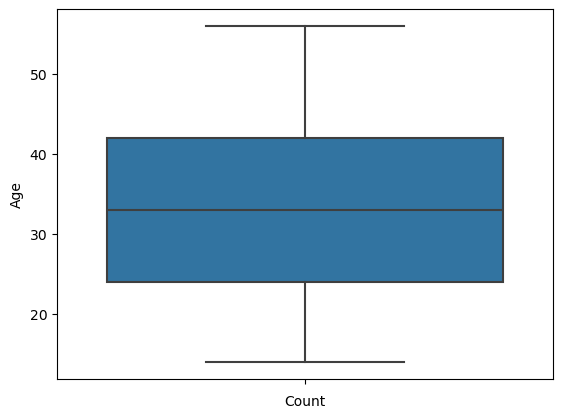

In [20]:
sns.boxplot(y=data["Age"])
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

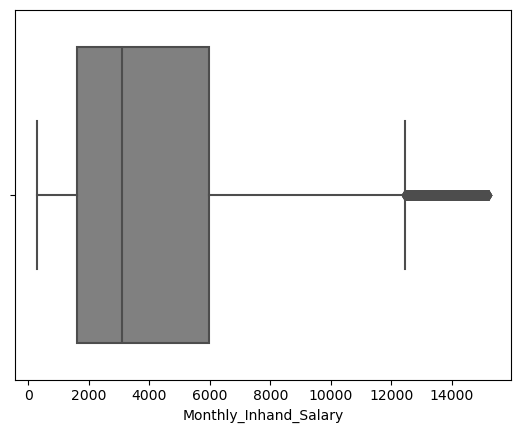

In [21]:
sns.boxplot(x=df['Monthly_Inhand_Salary'], color='gray')
plt.show()

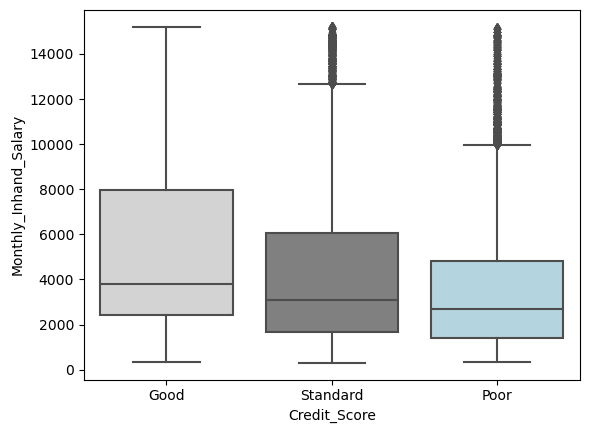

In [22]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, palette=palette)
plt.show()

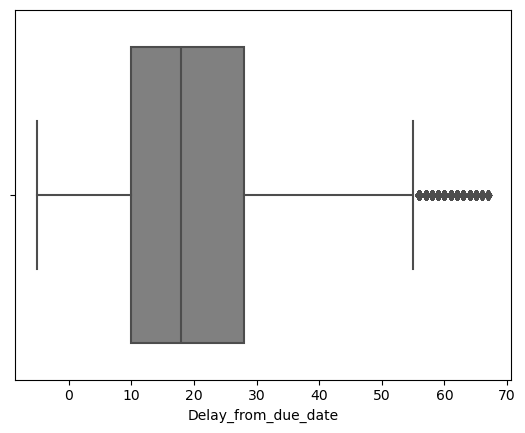

In [23]:
sns.boxplot(x=df['Delay_from_due_date'], color='gray')
plt.show()

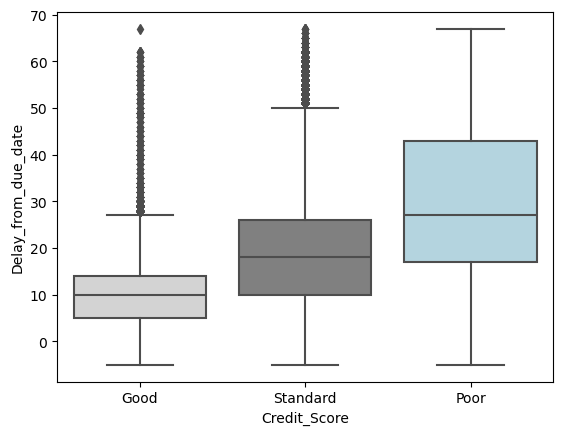

In [24]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, palette=palette)
plt.show()

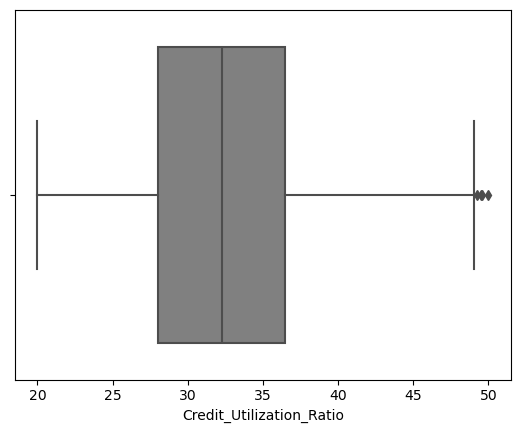

In [25]:
sns.boxplot(x=df['Credit_Utilization_Ratio'], color='gray')
plt.show()

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

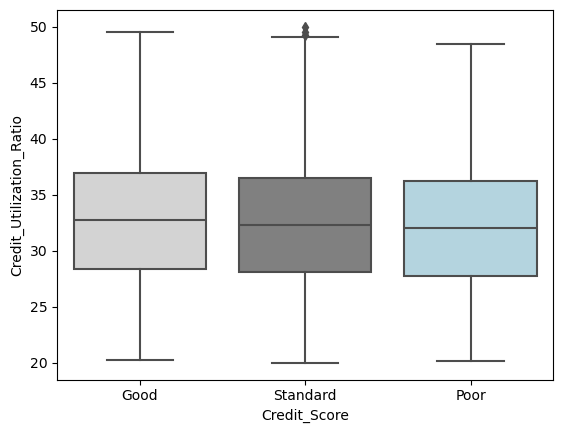

In [26]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
sns.boxplot(x='Credit_Score',y='Credit_Utilization_Ratio', data=df,palette=palette)

C:\Users\rushi\AppData\Local\Temp\ipykernel_24792\4091002629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Inhand_Salary'])


<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

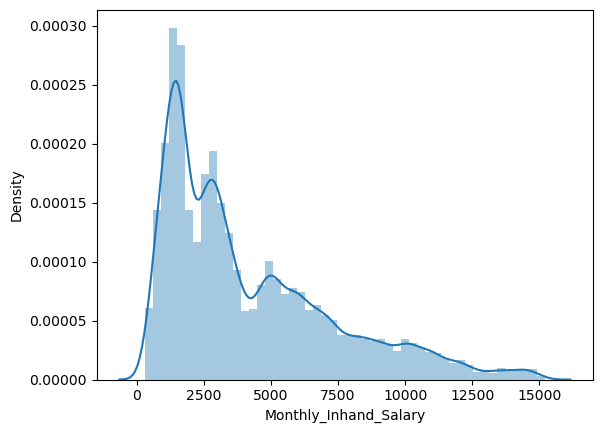

In [27]:
sns.distplot(df['Monthly_Inhand_Salary'])

C:\Users\rushi\AppData\Local\Temp\ipykernel_24792\341845921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delay_from_due_date'])


<Axes: xlabel='Delay_from_due_date', ylabel='Density'>

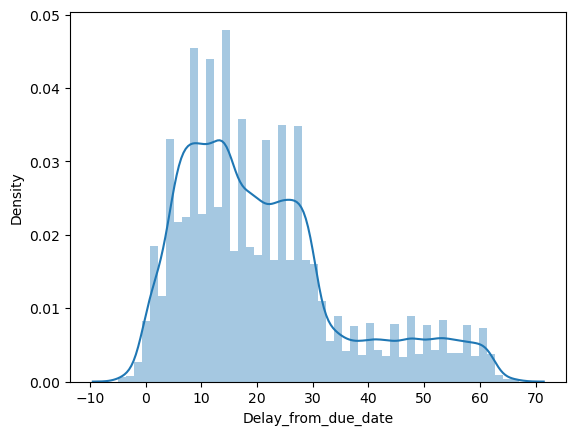

In [28]:
sns.distplot(df['Delay_from_due_date'])

C:\Users\rushi\AppData\Local\Temp\ipykernel_24792\480478915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_Utilization_Ratio'])


<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Density'>

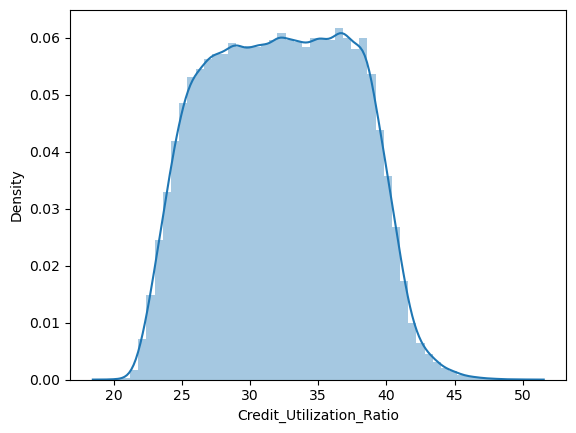

In [29]:
sns.distplot(df['Credit_Utilization_Ratio'])

C:\Users\rushi\AppData\Local\Temp\ipykernel_24792\957226029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_of_Delayed_Payment'])


<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Density'>

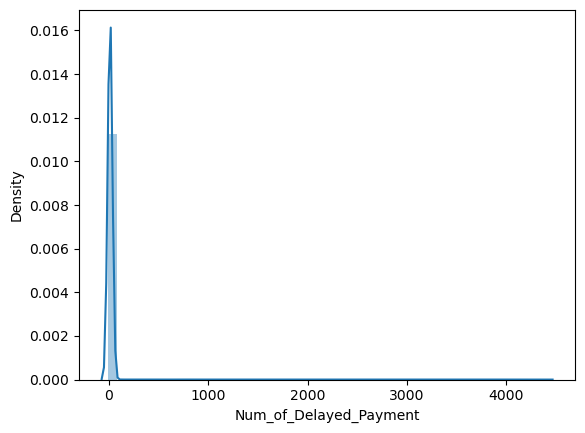

In [30]:
sns.distplot(df['Num_of_Delayed_Payment'])

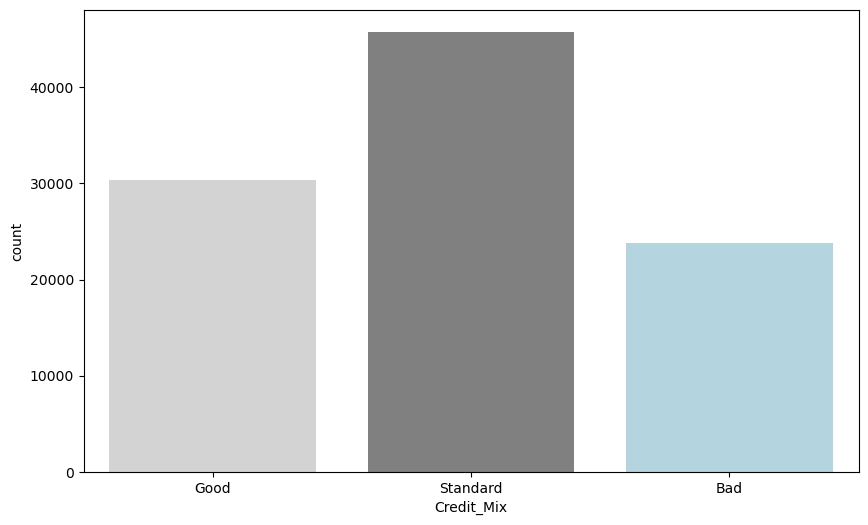

In [31]:
palette = sns.color_palette(['lightgray', 'gray', 'lightblue'], as_cmap=True)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Credit_Mix',palette=palette)
plt.show()

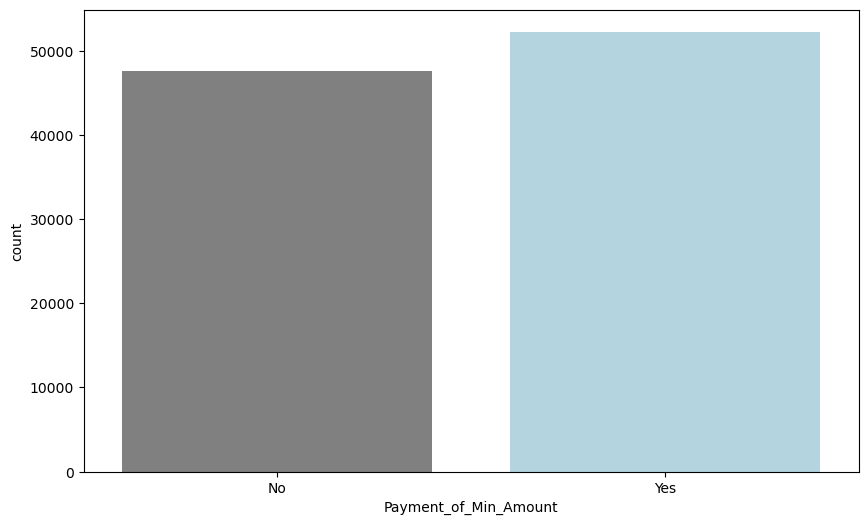

In [32]:
custom_palette = ["gray", "lightblue"]


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_of_Min_Amount', palette=custom_palette)

plt.show()

### Data Transformation

In [33]:

df['Credit_Mix'] = df['Credit_Mix'].replace(["Bad", "Standard", "Good"], [0, 1, 2])

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(["No", "Yes"], [0, 1])
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype(int)

df['Credit_Score'] = df['Credit_Score'].replace(["Poor", "Standard", "Good"], [0, 1, 2])
df['Credit_Score'] = df['Credit_Score'].astype(int)

### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
df[df.select_dtypes(include='object').columns]=df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

##  Splitting data,Scaling data,and importing machine learning models

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [39]:
# Separate features and target variable
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Preprocess categorical variables
categorical_cols = ['Month']  # Specify categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

In [42]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [43]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

### Logistic Regression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([2, 0, 2, ..., 1, 1, 1])

# Confusion matrics

In [47]:
tab = confusion_matrix(y_test, y_pred)
tab

array([[2404, 2921,  549],
       [1298, 7662, 1639],
       [  51, 1211, 2265]], dtype=int64)

In [48]:
Acc = tab.diagonal().sum()*100/tab.sum()
Acc

61.655

In [49]:
result_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred})
print(result_df)

       Actual Value  Predicted Value
75721             2                2
80184             0                0
19864             2                2
76699             0                0
92991             2                2
...             ...              ...
32595             1                1
29313             1                1
37862             0                1
53421             1                1
42410             1                1

[20000 rows x 2 columns]


### Decision Tree

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [52]:
pred_value = dt.predict(X_test_scaled)
pred_value

array([2, 0, 2, ..., 0, 1, 0])

In [53]:
tab1 = confusion_matrix(y_test,pred_value)
tab1

array([[4014, 1685,  175],
       [1642, 7832, 1125],
       [ 169, 1140, 2218]], dtype=int64)

In [54]:
accuracy_score(y_test,pred_value)*100

70.32000000000001

In [55]:
result_df_dt = pd.DataFrame({"Actual Value": y_test, "Predicted Value": pred_value})
print(result_df_dt)

       Actual Value  Predicted Value
75721             2                2
80184             0                0
19864             2                2
76699             0                0
92991             2                2
...             ...              ...
32595             1                1
29313             1                1
37862             0                0
53421             1                1
42410             1                0

[20000 rows x 2 columns]


### Hyperparameter Tuning (Decision Tree)

In [56]:
parameters = {
    'max_features': ['log2', 'sqrt'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10, 50],
    'min_samples_split': [2, 3, 50, 100],
    'min_samples_leaf': [1, 5, 8, 10]}

In [57]:
grid_obj = GridSearchCV(dt, parameters)

In [58]:
grid_obj = grid_obj.fit(X_train, y_train)

In [59]:
dt = grid_obj.best_estimator_

In [60]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, max_features='log2', min_samples_leaf=5,
                       min_samples_split=50)

In [61]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([2, 0, 1, ..., 1, 1, 0])

In [62]:
tab2 = confusion_matrix(y_test,pred_value)
tab2

array([[4014, 1685,  175],
       [1642, 7832, 1125],
       [ 169, 1140, 2218]], dtype=int64)

In [63]:
acc_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
print("Accuracy after hyperparameter tuning (Decision Tree): ", acc_dt)

Accuracy after hyperparameter tuning (Decision Tree):  70.57


### Random Forest

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [66]:
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array([2, 0, 2, ..., 1, 1, 0])

In [67]:
tab3 = confusion_matrix(y_test,y_pred_rf)
tab3

array([[4778, 1011,   85],
       [1247, 8598,  754],
       [  21,  902, 2604]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred_rf)*100

79.9

### Review
  Based on the evaluation of all models, the Random Forest model achieved the highest accuracy of 79%. Therefore, we will leverage this model to predict on the  test data.

[2 0 2 ... 1 1 0]
[[4767 1022   85]
 [1253 8608  738]
 [  15  949 2563]]


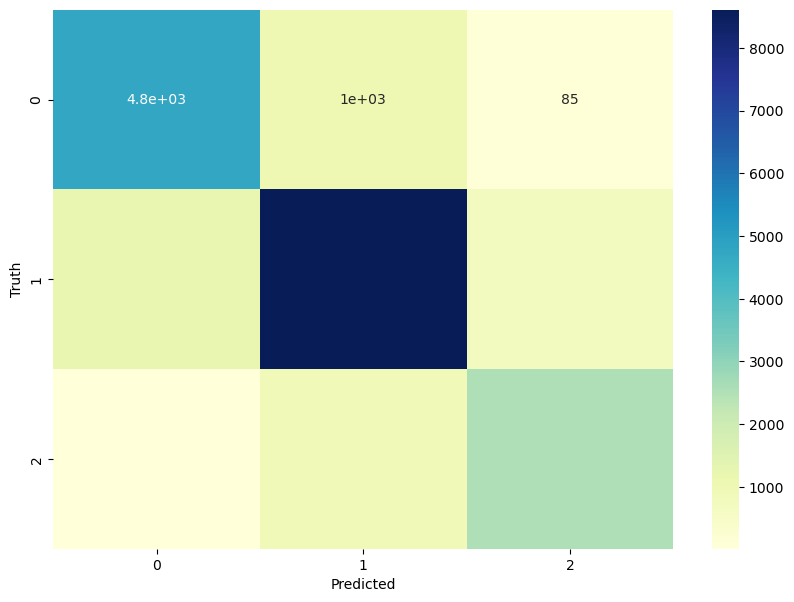

In [69]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(y_pred)

from sklearn.metrics import confusion_matrix


ConfusionMetricModel = confusion_matrix(y_test, y_pred)


print(ConfusionMetricModel)


cmap = "YlGnBu" 
plt.figure(figsize=(10, 7))
sns.heatmap(ConfusionMetricModel, annot=True, cmap=cmap)  # Add cmap argument
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show() 